# INTRODUCTION

The develop a model for predicting fraudulent transactions for afinancial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns.

Importing basic libraries to proceed


In [1]:
#Importing libaries basic Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,10)
%matplotlib inline 
# To ignore the unwanted Warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#data load
ds = pd.read_csv('Fraud.csv')

Exploratory Data Analysis

In [3]:
ds.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
ds.shape

(6362620, 11)

In [6]:
ds.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
numerical_columns = ds.describe().columns

In [8]:
numerical_columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [9]:
ds[numerical_columns]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0


In [10]:
categorical_columns = list(set(ds.columns.difference(numerical_columns)))

In [11]:
categorical_columns

['nameOrig', 'type', 'nameDest']

In [12]:
ds[categorical_columns]

,nameOrig,type,nameDest
0,C1231006815,PAYMENT,M1979787155
1,C1666544295,PAYMENT,M2044282225
2,C1305486145,TRANSFER,C553264065
3,C840083671,CASH_OUT,C38997010
4,C2048537720,PAYMENT,M1230701703
...,...,...,...
6362615,C786484425,CASH_OUT,C776919290
6362616,C1529008245,TRANSFER,C1881841831
6362617,C1162922333,CASH_OUT,C1365125890
6362618,C1685995037,TRANSFER,C2080388513


Now i have separated numeric columns and categorical columns for better understanding.

In [13]:
ds.rename(columns={"oldbalanceOrg":'old_balanceOrg',"newbalanceOrig":'new_balanceOrig',"oldbalanceDest":"old_balanceDest","newbalanceDest":"new_balanceDest","isFraud":"is_Fraud","isFlaggedFraud":'Target'},inplace=True)

In [14]:
ds.rename

<bound method DataFrame.rename of          step      type      amount     nameOrig  old_balanceOrg  \
0           1   PAYMENT     9839.64  C1231006815       170136.00   
1           1   PAYMENT     1864.28  C1666544295        21249.00   
2           1  TRANSFER      181.00  C1305486145          181.00   
3           1  CASH_OUT      181.00   C840083671          181.00   
4           1   PAYMENT    11668.14  C2048537720        41554.00   
...       ...       ...         ...          ...             ...   
6362615   743  CASH_OUT   339682.13   C786484425       339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245      6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333      6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037       850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807       850002.52   

         new_balanceOrig     nameDest  old_balanceDest  new_balanceDest  \
0              160296.36  M1979787155             0.00             0.00   

# Checking NULL Values in the dataset

In [15]:
ds.isnull().sum() 

step               0
type               0
amount             0
nameOrig           0
old_balanceOrg     0
new_balanceOrig    0
nameDest           0
old_balanceDest    0
new_balanceDest    0
is_Fraud           0
Target             0
dtype: int64

In [16]:
ds

,step,type,amount,nameOrig,old_balanceOrg,new_balanceOrig,nameDest,old_balanceDest,new_balanceDest,is_Fraud,Target
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


There is no missing value present in this dataset.

In [17]:
ds.corr()

,step,amount,old_balanceOrg,new_balanceOrig,old_balanceDest,new_balanceDest,is_Fraud,Target
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
old_balanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
new_balanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
old_balanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
new_balanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
is_Fraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
Target,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


visualization using plot for better understanding 

<AxesSubplot:>

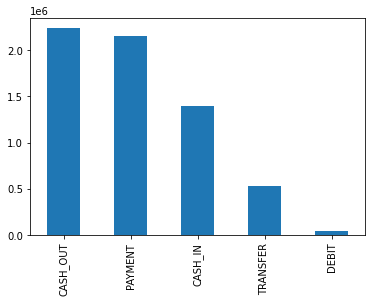

In [18]:
ds['type'].value_counts().plot(kind='bar')

In [19]:
ds['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Creating dummy variables for proceed with one hot encoding

In [20]:
type = pd.get_dummies(ds['type'],drop_first=True)

In [21]:
type

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
6362615,1,0,0,0
6362616,0,0,0,1
6362617,1,0,0,0
6362618,0,0,0,1


In [22]:
ds = pd.concat((ds,type),1)

In [23]:
ds.head()

,step,type,amount,nameOrig,old_balanceOrg,new_balanceOrig,nameDest,old_balanceDest,new_balanceDest,is_Fraud,Target,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


concated and droped the type columns in the dataset

In [24]:
ds = ds.drop(('type'),axis=1)

In [25]:
ds

,step,amount,nameOrig,old_balanceOrg,new_balanceOrig,nameDest,old_balanceDest,new_balanceDest,is_Fraud,Target,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,1


Droped unnecessary columns from the dataset

In [26]:
ds = ds.drop(['nameOrig','nameDest'],axis=1)

In [27]:
ds

,step,amount,old_balanceOrg,new_balanceOrig,old_balanceDest,new_balanceDest,is_Fraud,Target,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,1


# checking Imbalance data in the dataset

In [28]:
ds['Target'].value_counts()

0    6362604
1         16
Name: Target, dtype: int64

In [29]:
ds.shape

(6362620, 12)

In [30]:
ds.Target

0          0
1          0
2          0
3          0
4          0
          ..
6362615    0
6362616    0
6362617    0
6362618    0
6362619    0
Name: Target, Length: 6362620, dtype: int64

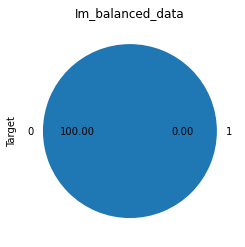

In [31]:
ds['Target'].value_counts().plot.pie(title='Im_balanced_data',autopct='%.2f');

In [32]:
ds.columns

Index(['step', 'amount', 'old_balanceOrg', 'new_balanceOrig',
       'old_balanceDest', 'new_balanceDest', 'is_Fraud', 'Target', 'CASH_OUT',
       'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype='object')

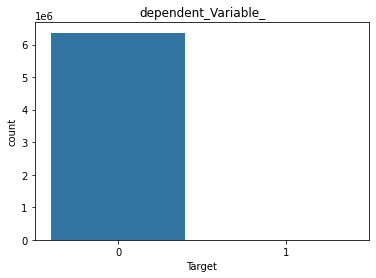

In [33]:
sns.countplot(x='Target',data=ds)
plt.title('dependent_Variable_')
plt.show()

Income is our target variable Seeing this visualization the dataset is highly imbalanced.

If the data is imbalanced, it can cause the overfitting and bias in the odel prediction.So it is important to check and cure the data imbalance if present.We check the target variable to see if it is balanced or not.

# Lets split the data into x and y

In [34]:
x = ds.drop(('Target'),1)
y = ds['Target']

In [35]:
y

0          0
1          0
2          0
3          0
4          0
          ..
6362615    0
6362616    0
6362617    0
6362618    0
6362619    0
Name: Target, Length: 6362620, dtype: int64

As we can see that we now have a un balanced dataset, so Lets proceed with the imblearn package to sort out this problem

In [36]:
! pip install imblearn

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
random = RandomOverSampler()

In [39]:
x_resamp , y_resamp = random.fit_resample(x,y)

In [40]:
6362604*2

12725208

In [41]:
print(x_resamp.shape)
print(y_resamp.shape)

(12725208, 11)
(12725208,)


# Target class before Balancing

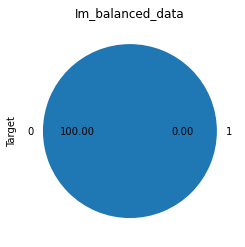

In [42]:
ds['Target'].value_counts().plot.pie(title='Im_balanced_data',autopct='%.2f');

# Target class After Balancing

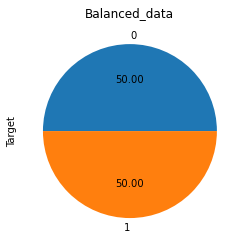

In [43]:
y_resamp.value_counts().plot.pie(title='Balanced_data',autopct='%.2f');

# Splitting into train and test

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resamp, y_resamp, test_size=0.25, random_state=0)
# test_size 0.3(30%) train_size 0.7(70%).....ideal train 75% and test 25%

# Logistic regression 

In [45]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression(random_state=0)
Log.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,f1_score,classification_report

In [47]:
train_predictions = Log.predict(x_test)
#test_predictions=Log.predict(y_train)

In [48]:
print('accuracy_score',accuracy_score(train_predictions,y_test))
print('F1_score',f1_score(train_predictions,y_test))
print('confusion_matrix',confusion_matrix(train_predictions,y_test)) 

accuracy_score 0.9827058229617937
F1_score 0.9830032406849616
confusion_matrix [[1535308       0]
 [  55018 1590976]]


In [49]:
#printing the classification Report

In [50]:
print('classification report',classification_report(y_test,train_predictions))

classification report               precision    recall  f1-score   support

           0       1.00      0.97      0.98   1590326
           1       0.97      1.00      0.98   1590976

    accuracy                           0.98   3181302
   macro avg       0.98      0.98      0.98   3181302
weighted avg       0.98      0.98      0.98   3181302



In [51]:
#predicting probability

In [52]:
y_train_pred = Log.predict_proba(x_train)
y_test_pred = Log.predict_proba(x_test)

In [53]:
print('Train_probability',roc_auc_score(y_train,y_train_pred[:,1]))
print('Test_probability',roc_auc_score(y_test,y_test_pred[:,1]))

Train_probability 0.9997340501948325
Test_probability 0.9997359539264323


In [54]:
#lets plot the AUC and ROC curve

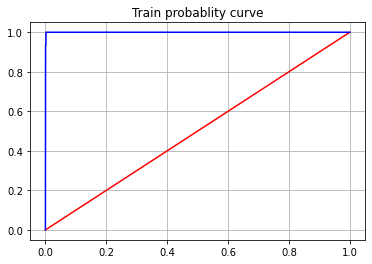

In [55]:
fpr,tpr, threshold = roc_curve(y_train,y_train_pred[:,1])
plt.plot(fpr,fpr,color='r')
plt.plot(fpr,tpr,color='b')
plt.grid(True)
plt.gray()
plt.title('Train probablity curve')
plt.show()

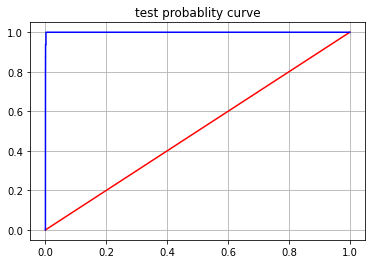

In [56]:
fpr,tpr, threshold = roc_curve(y_test,y_test_pred[:,1])
plt.plot(fpr,fpr,color='r')
plt.plot(fpr,tpr,color='b')
plt.grid(True)
plt.gray()
plt.title('test probablity curve')
plt.show()

MODEL 4: DECISION TREE CLASSIFIER

In [57]:
from sklearn.tree import DecisionTreeClassifier 

In [58]:
clf = DecisionTreeClassifier()

In [59]:
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

In [60]:
y_dc = clf.predict(x_test)

In [61]:
print('accuracy_score',accuracy_score(y_dc,y_test))
print('F1_score',f1_score(y_dc,y_test))
print('confusion_matrix',confusion_matrix(y_dc,y_test))  

accuracy_score 1.0
F1_score 1.0
confusion_matrix [[1590326       0]
 [      0 1590976]]


In [62]:
print('classification report\n',classification_report(y_test,y_dc))

classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1590326
           1       1.00      1.00      1.00   1590976

    accuracy                           1.00   3181302
   macro avg       1.00      1.00      1.00   3181302
weighted avg       1.00      1.00      1.00   3181302



# Conclusion

#Your task is to execute the process for proactive detection of fraud while answering following questions.
1. Data cleaning including missing values, outliers and multi-collinearity. 
    #In this dataset i did'nt see any missing values present.
    #It is an classification problem so In classification problem we wont use outliers. so i didnt use outliers
    #There is no multi_collinearity in the dataset
###################################################################################################################
2. Describe your fraud detection model in elaboration?
    #Here i have used logestic regression as my model. Comparing to Decision Tree logestic regression gave good  accuracy score      of 0.98270....
###################################################################################################################
3. How did you select variables to be included in the model?
   #When you are clueless about which variables to include in the model, just do a correlation matrix and select those      independent variables with high correlation with dependent variable. Back to the Multi-Collinearity issue, we can see that from the correlation matrix, quite a few variables are correlated to each other.
####################################################################################################################
4. Demonstrate the performance of the model by using best set of tools. 
    Comparing to Decision Tree logestic regression gave good  accuracy score of 0.98270....
###################################################################################################################
5. What are the key factors that predict fraudulent customer? 
   We can predict fraud in a large volume of transactions by applying cognitive computing technologies to raw data. This is the reason why we use machine learning algorithms for preventing fraud for our clients.
####################################################################################################################